In [1]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle as mpl_Rectangle
from matplotlib.ticker import MultipleLocator as mpl_MultipleLocator

from nbmetalog import nbmetalog as nbm
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp

from pylib.hanoi import get_hanoi_value_at_index


In [2]:
nbm.print_metadata()


context: ci
hostname: fv-az1114-679
interpreter: 3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]
nbcellexec: null
nbname: hanoi-strategy
nbpath: /home/runner/work/hstrat-surface-concept/hstrat-surface-concept/binder/hanoi-strategy.ipynb
revision: null
session: 46fa2b4d-1a3c-4669-825d-c24ad06d6fe6
timestamp: 2024-07-27T20:58:32Z00:00


IPython==7.31.1
keyname==0.5.2
yaml==6.0
matplotlib==3.8.3
nbmetalog==0.2.6
pandas==1.5.2
seaborn==0.13.2
teeplot==1.0.1
re==2.2.1
comm==0.1.3
logging==0.5.1.2
psutil==5.9.5
zmq==25.1.0
json==2.0.9
ipykernel==6.23.3


In [3]:
def lolliplot(
    data: pd.DataFrame, x: str, y: str, hue: str, **kwargs
) -> plt.Axes:
    ax = sns.barplot(
        data=data,
        x=x,
        y=y,
        color="k",
        gap=0.6,
        **kwargs,
    )
    sns.scatterplot(
        data=data,
        x=x,
        y=y,
        hue=hue,
        palette="tab10",
        legend=False,
        **{
            "ax": ax,
            **kwargs,
        },
    )
    ax.xaxis.set_major_locator(mpl_MultipleLocator(16))
    ax.xaxis.set_minor_locator(mpl_MultipleLocator(8))
    ax.spines[["right", "top"]].set_visible(False)

    return ax


## Generate Hanoi Data


In [4]:
records = [
    {
        "index": i,
        "hanoi value": get_hanoi_value_at_index(i),
    }
    for i in range(200)
]
df = pd.DataFrame.from_records(records)


## Plot Hanoi Data


In [5]:
aspect = 7
height = 2


teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=hanoi-50+x=index+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=hanoi-50+x=index+y=hanoi-value+ext=.png


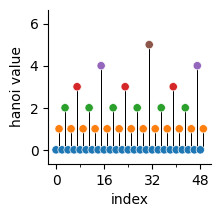

teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=hanoi-50+x=index+xlim=100+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=hanoi-50+x=index+xlim=100+y=hanoi-value+ext=.png


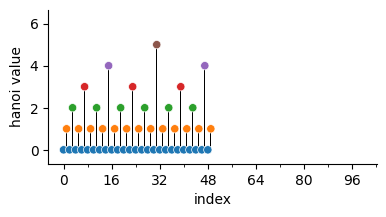

teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=hanoi-100+x=index+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=hanoi-100+x=index+y=hanoi-value+ext=.png


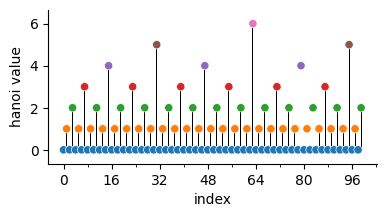

teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=hanoi-100+x=index+xlim=100+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=hanoi-100+x=index+xlim=100+y=hanoi-value+ext=.png


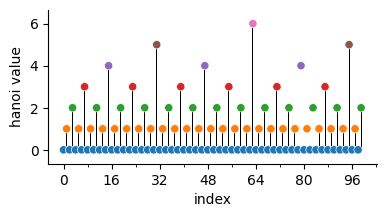

In [6]:
for lim in 50, 100:
    for xlim in None, 100:
        outattrs = {"what": f"hanoi-{lim}"}
        if xlim is not None:
            outattrs["xlim"] = xlim
        saveit, ax = tp.tee(
            lolliplot,
            df[df["index"] < lim],
            x="index",
            y="hanoi value",
            hue="hanoi value",
            teeplot_callback=True,
            teeplot_outattrs=outattrs,
            teeplot_subdir="hanoi-strategy",
        )

        ax.set_ylim(-0.66, 6.66)
        ax.figure.set_figheight(height)
        ax.set_aspect(aspect)

        if xlim is not None:  # set xlim as-if to account for padding
            lolliplot(
                data=df[df["index"] < xlim],
                x="index",
                y="hanoi value",
                hue="hanoi value",
                ax=ax,
                alpha=0.0,
            )

        saveit()


## Illustrate Top N Strategy


teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=top-n-before+x=index+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=top-n-before+x=index+y=hanoi-value+ext=.png


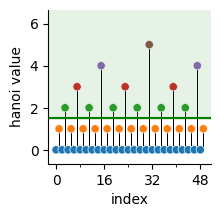

teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=top-n-before+x=index+xlim=100+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=top-n-before+x=index+xlim=100+y=hanoi-value+ext=.png


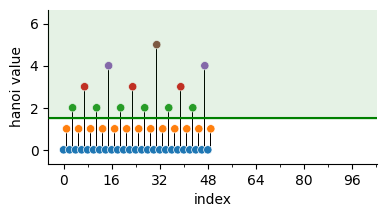

In [7]:
for xlim in None, 100:
    outattrs = {"what": "top-n-before"}
    if xlim is not None:
        outattrs["xlim"] = xlim

    saveit, ax = tp.tee(
        lolliplot,
        df[df["index"] < 50],
        x="index",
        y="hanoi value",
        hue="hanoi value",
        teeplot_callback=True,
        teeplot_outattrs=outattrs,
        teeplot_subdir="hanoi-strategy",
    )
    if xlim is not None:  # set xlim as-if to account for padding
        lolliplot(
            data=df[df["index"] < xlim],
            x="index",
            y="hanoi value",
            hue="hanoi value",
            ax=ax,
            alpha=0.0,
        )

    ax.set_ylim(-0.66, 6.66)
    ax.figure.set_figheight(height)
    ax.set_aspect(aspect)
    xlim_ = ax.get_xlim()  # prevent rectangles from skewing padding

    ax.axhline(1.5, color="green")
    for fill, alpha, hatch in ("green", 0.1, ""), (None, 0.5, ""):
        rect = mpl_Rectangle(
            (-1000, 1.5),
            width=2000,
            height=100,
            alpha=alpha,
            color="green",
            fill=fill,
            hatch=hatch,
            zorder=10,
        )
        ax.add_patch(rect)

    ax.set_xlim(xlim_)
    saveit()


teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=top-n-after+x=index+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=top-n-after+x=index+y=hanoi-value+ext=.png


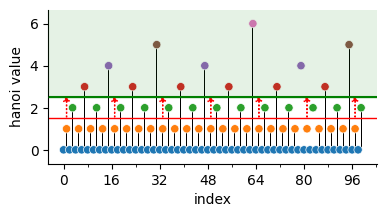

In [8]:
dfx = df[df["index"] < 100]

saveit, ax = tp.tee(
    lolliplot,
    dfx,
    x="index",
    y="hanoi value",
    hue="hanoi value",
    teeplot_callback=True,
    teeplot_outattrs={"what": "top-n-after"},
    teeplot_subdir="hanoi-strategy",
)

xlim_ = ax.get_xlim()  # prevent rectangles from skewing padding

for __, row in dfx.iterrows():
    if row["hanoi value"] == 1 and row["index"] % 16 == 1:
        ax.arrow(
            x=row["index"],
            y=1.5,
            dx=0,
            dy=1,
            color="red",
            head_length=0.2,
            head_width=2,
            length_includes_head=True,
            linestyle=":",
            clip_on=False,
        )

ax.axhline(1.5, color="red", lw=1)
ax.axhline(2.5, color="green")

for fill, alpha, hatch in ("green", 0.1, ""), (None, 0.5, ""):
    rect = mpl_Rectangle(
        (-1000, 2.5),
        width=2000,
        height=100,
        alpha=alpha,
        color="green",
        fill=fill,
        hatch=hatch,
        zorder=10,
    )
    ax.add_patch(rect)

ax.set_ylim(-0.66, 6.66)
ax.figure.set_figheight(height)
ax.set_aspect(aspect)

ax.set_xlim(xlim_)
saveit()
pass


## Illustrate Last N Strategy


teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=last-n-before+x=index+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=last-n-before+x=index+y=hanoi-value+ext=.png


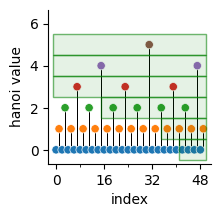

teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=last-n-before+x=index+xlim=100+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=last-n-before+x=index+xlim=100+y=hanoi-value+ext=.png


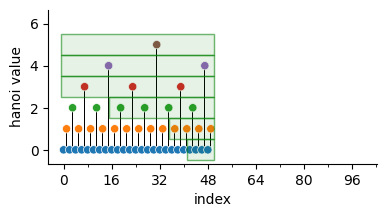

In [9]:
for xlim in None, 100:
    outattrs = {"what": "last-n-before"}
    if xlim is not None:
        outattrs["xlim"] = xlim

    saveit, ax = tp.tee(
        lolliplot,
        df[df["index"] < 50],
        x="index",
        y="hanoi value",
        hue="hanoi value",
        teeplot_callback=True,
        teeplot_outattrs=outattrs,
        teeplot_subdir="hanoi-strategy",
    )
    if xlim is not None:  # set xlim as-if to account for padding
        lolliplot(
            data=df[df["index"] < xlim],
            x="index",
            y="hanoi value",
            hue="hanoi value",
            ax=ax,
            alpha=0.0,
        )

    ax.set_ylim(-0.66, 6.66)
    ax.figure.set_figheight(height)
    ax.set_aspect(aspect)
    xlim_ = ax.get_xlim()  # prevent rectangles from skewing padding

    for y, dx in (0, 9), (1, 15), (2, 35), (3, 51), (4, 51), (5, 51):
        rect = mpl_Rectangle(
            (50 - dx, y - 0.5),
            width=dx,
            height=1,
            alpha=0.1,
            color="green",
            zorder=10,
        )
        ax.add_patch(rect)
        rect = mpl_Rectangle(
            (50 - dx, y - 0.5),
            width=dx,
            height=1,
            alpha=0.5,
            color="green",
            fill=None,
            zorder=10,
        )
        ax.add_patch(rect)

    ax.set_xlim(xlim_)
    saveit()


teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=last-n-after+x=index+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=last-n-after+x=index+y=hanoi-value+ext=.png


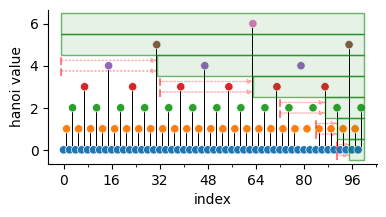

In [10]:
dfx = df[df["index"] < 100]

saveit, ax = tp.tee(
    lolliplot,
    dfx,
    x="index",
    y="hanoi value",
    hue="hanoi value",
    teeplot_callback=True,
    teeplot_outattrs={"what": "last-n-after"},
    teeplot_subdir="hanoi-strategy",
)

ax.set_ylim(-0.66, 6.66)
ax.figure.set_figheight(height)
ax.set_aspect(aspect)
xlim_ = ax.get_xlim()  # prevent rectangles from skewing padding

for y, dx in (0, 5), (1, 9), (2, 13), (3, 37), (4, 69), (5, 101), (6, 101):
    rect = mpl_Rectangle(
        (100 - dx, y - 0.5),
        width=dx,
        height=1,
        alpha=0.1,
        color="green",
        zorder=10,
    )
    ax.add_patch(rect)
    rect = mpl_Rectangle(
        (100 - dx, y - 0.5),
        width=dx,
        height=1,
        alpha=0.5,
        color="green",
        fill=None,
        zorder=10,
    )
    ax.add_patch(rect)


ax.plot([-1, -1], [3.5, 4.5], color="red", alpha=0.5, ls="--")
for adj in 0, 0.5:
    ax.arrow(
        x=-1,
        y=3.75 + adj,
        dx=32,
        dy=0,
        color="red",
        head_length=2,
        head_width=0.2,
        length_includes_head=True,
        alpha=0.3,
        linestyle=":",
        clip_on=False,
        zorder=-10,
    )

ax.plot([32, 32], [2.5, 3.5], color="red", alpha=0.5, ls="--")
for adj in 0, 0.5:
    ax.arrow(
        x=32,
        y=2.75 + adj,
        dx=31,
        dy=0,
        color="red",
        head_length=2,
        head_width=0.2,
        length_includes_head=True,
        alpha=0.3,
        linestyle=":",
        clip_on=False,
        zorder=-10,
    )

ax.plot([72, 72], [1.5, 2.5], color="red", alpha=0.5, ls="--")
for adj in 0, 0.5:
    ax.arrow(
        x=72,
        y=1.75 + adj,
        dx=15,
        dy=0,
        color="red",
        head_length=2,
        head_width=0.2,
        length_includes_head=True,
        alpha=0.3,
        linestyle=":",
        clip_on=False,
        zorder=-10,
    )

ax.plot([84, 84], [0.5, 1.5], color="red", alpha=0.5, ls="--")
for adj in 0, 0.5:
    ax.arrow(
        x=84,
        y=0.75 + adj,
        dx=7,
        dy=0,
        color="red",
        head_length=2,
        head_width=0.2,
        length_includes_head=True,
        alpha=0.3,
        linestyle=":",
        clip_on=False,
        zorder=-10,
    )

ax.plot([91, 91], [-0.5, 0.5], color="red", alpha=0.5, ls="--")
for adj in 0, 0.5:
    ax.arrow(
        x=91,
        y=-0.25 + adj,
        dx=4,
        dy=0,
        color="red",
        head_length=2,
        head_width=0.2,
        length_includes_head=True,
        alpha=0.3,
        linestyle=":",
        clip_on=False,
        zorder=-10,
    )

ax.set_xlim(xlim_)
saveit()
pass


## Illustrate Last N Strategy (Alt)


teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=last-n-after-alt+x=index+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=last-n-after-alt+x=index+y=hanoi-value+ext=.png


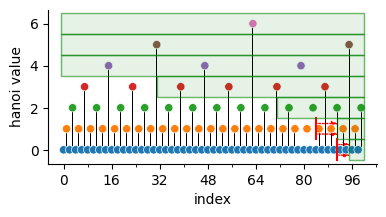

In [11]:
dfx = df[df["index"] < 100]

saveit, ax = tp.tee(
    lolliplot,
    dfx,
    x="index",
    y="hanoi value",
    hue="hanoi value",
    teeplot_callback=True,
    teeplot_outattrs={"what": "last-n-after-alt"},
    teeplot_subdir="hanoi-strategy",
)

ax.set_ylim(-0.66, 6.66)
ax.figure.set_figheight(height)
ax.set_aspect(aspect)
xlim_ = ax.get_xlim()  # prevent rectangles from skewing padding

for y, dx in (0, 5), (1, 9), (2, 29), (3, 69), (4, 101), (5, 101), (6, 101):
    rect = mpl_Rectangle(
        (100 - dx, y - 0.5),
        width=dx,
        height=1,
        alpha=0.1,
        color="green",
        zorder=10,
    )
    ax.add_patch(rect)
    rect = mpl_Rectangle(
        (100 - dx, y - 0.5),
        width=dx,
        height=1,
        alpha=0.5,
        color="green",
        fill=None,
        zorder=10,
    )
    ax.add_patch(rect)


ax.plot([84, 84], [0.5, 1.5], color="red", ls="-")
for adj in 0, 0.5:
    ax.arrow(
        x=84,
        y=0.75 + adj,
        dx=7,
        dy=0,
        color="red",
        head_length=2,
        head_width=0.2,
        length_includes_head=True,
        # alpha=0.3,
        linestyle=":",
        clip_on=False,
        zorder=-10,
    )

ax.plot([91, 91], [-0.5, 0.5], color="red", ls="-")
for adj in 0, 0.5:
    ax.arrow(
        x=91,
        y=-0.25 + adj,
        dx=4,
        dy=0,
        color="red",
        head_length=2,
        head_width=0.2,
        length_includes_head=True,
        # alpha=0.3,
        linestyle=":",
        clip_on=False,
        zorder=-10,
    )

ax.set_xlim(xlim_)
saveit()
pass


## Illustrate First N Strategy


teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=first-n-before+x=index+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=first-n-before+x=index+y=hanoi-value+ext=.png


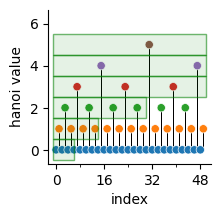

teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=first-n-before+x=index+xlim=100+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=first-n-before+x=index+xlim=100+y=hanoi-value+ext=.png


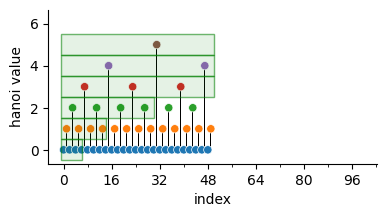

In [12]:
for xlim in None, 100:
    outattrs = {"what": "first-n-before"}
    if xlim is not None:
        outattrs["xlim"] = xlim
    saveit, ax = tp.tee(
        lolliplot,
        df[df["index"] < 50],
        x="index",
        y="hanoi value",
        hue="hanoi value",
        teeplot_callback=True,
        teeplot_outattrs=outattrs,
        teeplot_subdir="hanoi-strategy",
    )
    if xlim is not None:  # set xlim as-if to account for padding
        lolliplot(
            data=df[df["index"] < xlim],
            x="index",
            y="hanoi value",
            hue="hanoi value",
            ax=ax,
            alpha=0.0,
        )

    ax.set_ylim(-0.66, 6.66)
    ax.figure.set_figheight(height)
    ax.set_aspect(aspect)
    xlim_ = ax.get_xlim()  # prevent rectangles from skewing padding


    for y, dx in (0, 7), (1, 15), (2, 31), (3, 51), (4, 51), (5, 51):
        rect = mpl_Rectangle(
            (-1, y - 0.5),
            width=dx,
            height=1,
            alpha=0.1,
            color="green",
            zorder=10,
        )
        ax.add_patch(rect)
        rect = mpl_Rectangle(
            (-1, y - 0.5),
            width=dx,
            height=1,
            alpha=0.5,
            color="green",
            fill=None,
            zorder=10,
        )
        ax.add_patch(rect)

    ax.set_xlim(xlim_)
    saveit()


teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=first-n-after+x=index+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=first-n-after+x=index+y=hanoi-value+ext=.png


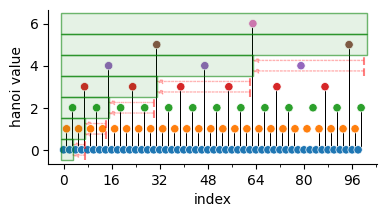

In [13]:
dfx = df[df["index"] < 100]

saveit, ax = tp.tee(
    lolliplot,
    dfx,
    x="index",
    y="hanoi value",
    hue="hanoi value",
    teeplot_callback=True,
    teeplot_outattrs={"what": "first-n-after"},
    teeplot_subdir="hanoi-strategy",
)

ax.set_ylim(-0.66, 6.66)
ax.figure.set_figheight(height)
ax.set_aspect(aspect)
xlim_ = ax.get_xlim()  # prevent rectangles from skewing padding

for y, dx in (0, 3), (1, 7), (2, 15), (3, 31), (4, 63), (5, 101), (6, 101):
    rect = mpl_Rectangle(
        (-1, y - 0.5),
        width=dx + 1,
        height=1,
        alpha=0.1,
        color="green",
        zorder=10,
    )
    ax.add_patch(rect)
    rect = mpl_Rectangle(
        (-1, y - 0.5),
        width=dx + 1,
        height=1,
        alpha=0.5,
        color="green",
        fill=None,
        zorder=10,
    )
    ax.add_patch(rect)


ax.plot([100, 100], [3.5, 4.5], color="red", alpha=0.5, ls="--")
for adj in 0, 0.5:
    ax.arrow(
        x=100,
        y=3.75 + adj,
        dx=-37,
        dy=0,
        color="red",
        head_length=2,
        head_width=0.2,
        length_includes_head=True,
        alpha=0.3,
        linestyle=":",
        clip_on=False,
        zorder=-10,
    )

ax.plot([62, 62], [2.5, 3.5], color="red", alpha=0.5, ls="--")
for adj in 0, 0.5:
    ax.arrow(
        x=62,
        y=2.75 + adj,
        dx=-31,
        dy=0,
        color="red",
        head_length=2,
        head_width=0.2,
        length_includes_head=True,
        alpha=0.3,
        linestyle=":",
        clip_on=False,
        zorder=-10,
    )

ax.plot([30, 30], [1.5, 2.5], color="red", alpha=0.5, ls="--")
for adj in 0, 0.5:
    ax.arrow(
        x=30,
        y=1.75 + adj,
        dx=-15,
        dy=0,
        color="red",
        head_length=2,
        head_width=0.2,
        length_includes_head=True,
        alpha=0.3,
        linestyle=":",
        clip_on=False,
        zorder=-10,
    )

ax.plot([14, 14], [0.5, 1.5], color="red", alpha=0.5, ls="--")
for adj in 0, 0.5:
    ax.arrow(
        x=14,
        y=0.75 + adj,
        dx=-7,
        dy=0,
        color="red",
        head_length=2,
        head_width=0.2,
        length_includes_head=True,
        alpha=0.3,
        linestyle=":",
        clip_on=False,
        zorder=-10,
    )

ax.plot([7, 7], [-0.5, 0.5], color="red", alpha=0.5, ls="--")
for adj in 0, 0.5:
    ax.arrow(
        x=7,
        y=-0.25 + adj,
        dx=-4,
        dy=0,
        color="red",
        head_length=2,
        head_width=0.2,
        length_includes_head=True,
        alpha=0.3,
        linestyle=":",
        clip_on=False,
        zorder=-10,
    )

ax.set_xlim(xlim_)
saveit()
pass


## Illustrate First N Strategy (Alt)


teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=first-n-after-alt+x=index+y=hanoi-value+ext=.pdf
teeplots/hanoi-strategy/hue=hanoi-value+viz=lolliplot+what=first-n-after-alt+x=index+y=hanoi-value+ext=.png


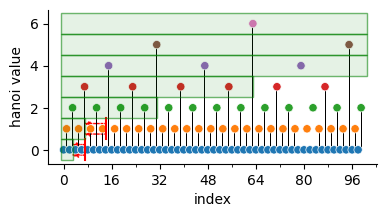

In [14]:
dfx = df[df["index"] < 100]

saveit, ax = tp.tee(
    lolliplot,
    dfx,
    x="index",
    y="hanoi value",
    hue="hanoi value",
    teeplot_callback=True,
    teeplot_outattrs={"what": "first-n-after-alt"},
    teeplot_subdir="hanoi-strategy",
)

ax.set_ylim(-0.66, 6.66)
ax.figure.set_figheight(height)
ax.set_aspect(aspect)
xlim_ = ax.get_xlim()  # prevent rectangles from skewing padding

for y, dx in (0, 3), (1, 7), (2, 31), (3, 63), (4, 101), (5, 101), (6, 101):
    rect = mpl_Rectangle(
        (-1, y - 0.5),
        width=dx + 1,
        height=1,
        alpha=0.1,
        color="green",
        zorder=10,
    )
    ax.add_patch(rect)
    rect = mpl_Rectangle(
        (-1, y - 0.5),
        width=dx + 1,
        height=1,
        alpha=0.5,
        color="green",
        fill=None,
        zorder=10,
    )
    ax.add_patch(rect)


ax.plot([14, 14], [0.5, 1.5], color="red", ls="-")
for adj in 0, 0.5:
    ax.arrow(
        x=14,
        y=0.75 + adj,
        dx=-7,
        dy=0,
        color="red",
        head_length=2,
        head_width=0.2,
        length_includes_head=True,
        # alpha=0.3,
        linestyle=":",
        clip_on=False,
        zorder=-10,
    )


ax.plot([7, 7], [-0.5, 0.5], color="red", ls="-")
for adj in 0, 0.5:
    ax.arrow(
        x=7,
        y=-0.25 + adj,
        dx=-4,
        dy=0,
        color="red",
        head_length=2,
        head_width=0.2,
        length_includes_head=True,
        # alpha=0.3,
        linestyle=":",
        clip_on=False,
        zorder=-10,
    )

ax.set_xlim(xlim_)
saveit()
pass
